In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [17]:
X_train.shape

(122289, 1044)

In [18]:
!pip3 install -U imbalanced-learn

In [19]:
## smote to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [20]:
X_test, y_test = sm.fit_resample(X_test, y_test)

In [21]:
X_train = X_train[10000:]
y_train = y_train[10000:]

In [22]:
X_train.shape

(352830, 1044)

In [18]:
## hyperparameter tuning for deep learning on a 10% sample of the data

from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(activation = 'relu', optimizer = 'adam', dropout_rate = 0.2, neurons = 128):
    model = Sequential()
    model.add(Dense(neurons, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation = 'softmax'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose = 0)

activation = ['relu', 'tanh']
optimizer = ['adam', 'rmsprop']
dropout_rate = [0.1, 0.2, 0.3]
neurons = [128, 256, 512]

param_grid = dict(activation = activation, optimizer = optimizer, dropout_rate = dropout_rate, neurons = neurons)

grid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 10, cv = 3, verbose = 10, n_jobs = -1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_13149/789189993.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 0)


[CV 3/3; 2/10] START activation=relu, dropout_rate=0.1, neurons=512, optimizer=rmsprop
[CV 1/3; 3/10] START activation=relu, dropout_rate=0.1, neurons=512, optimizer=adam
[CV 1/3; 1/10] START activation=tanh, dropout_rate=0.1, neurons=128, optimizer=adam
[CV 3/3; 1/10] START activation=tanh, dropout_rate=0.1, neurons=128, optimizer=adam
[CV 2/3; 1/10] START activation=tanh, dropout_rate=0.1, neurons=128, optimizer=adam
[CV 2/3; 3/10] START activation=relu, dropout_rate=0.1, neurons=512, optimizer=adam
[CV 2/3; 2/10] START activation=relu, dropout_rate=0.1, neurons=512, optimizer=rmsprop
[CV 1/3; 2/10] START activation=relu, dropout_rate=0.1, neurons=512, optimizer=rmsprop


2022-12-01 04:04:41.873766: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.902515: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.908926: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.909141: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.915625: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.932394: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.938046: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 04:04:41.979871: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


[CV 1/3; 1/10] END activation=tanh, dropout_rate=0.1, neurons=128, optimizer=adam;, score=0.297 total time= 1.5min
[CV 3/3; 1/10] END activation=tanh, dropout_rate=0.1, neurons=128, optimizer=adam;, score=0.667 total time= 1.5min
[CV 2/3; 1/10] END activation=tanh, dropout_rate=0.1, neurons=128, optimizer=adam;, score=0.225 total time= 1.5min
[CV 3/3; 3/10] START activation=relu, dropout_rate=0.1, neurons=512, optimizer=adam
[CV 1/3; 4/10] START activation=relu, dropout_rate=0.3, neurons=512, optimizer=adam
[CV 2/3; 4/10] START activation=relu, dropout_rate=0.3, neurons=512, optimizer=adam
[CV 1/3; 3/10] END activation=relu, dropout_rate=0.1, neurons=512, optimizer=adam;, score=0.294 total time= 2.2min
[CV 2/3; 3/10] END activation=relu, dropout_rate=0.1, neurons=512, optimizer=adam;, score=0.178 total time= 2.3min
[CV 3/3; 4/10] START activation=relu, dropout_rate=0.3, neurons=512, optimizer=adam
[CV 1/3; 5/10] START activation=relu, dropout_rate=0.2, neurons=128, optimizer=adam
[CV 3

2022-12-01 04:10:55.571706: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [23]:

grid_result.best_params_

NameError: name 'grid_result' is not defined

In [20]:
grid_result.best_score_

0.402233362197876

In [28]:
{'optimizer': 'adam', 'neurons': 512, 'dropout_rate': 0.3, 'activation': 'relu'}

## model with best parameters
model = Sequential()
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)
history = model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/200
11339/11339 [==============================] - 153s 13ms/step - loss: 0.2762 - accuracy: 0.6868 - val_loss: 0.2544 - val_accuracy: 0.7225
Epoch 2/200
11339/11339 [==============================] - 150s 13ms/step - loss: 0.2583 - accuracy: 0.7135 - val_loss: 0.2489 - val_accuracy: 0.7264
Epoch 3/200
11339/11339 [==============================] - 148s 13ms/step - loss: 0.2546 - accuracy: 0.7184 - val_loss: 0.2477 - val_accuracy: 0.7275
Epoch 4/200
11339/11339 [==============================] - 155s 14ms/step - loss: 0.2529 - accuracy: 0.7209 - val_loss: 0.2529 - val_accuracy: 0.7255
Epoch 5/200
11339/11339 [==============================] - 167s 15ms/step - loss: 0.2518 - accuracy: 0.7235 - val_loss: 0.2505 - val_accuracy: 0.7301
Epoch 6/200
11339/11339 [==============================] - 132s 12ms/step - loss: 0.2505 - accuracy: 0.7248 - val_loss: 0.2514 - val_accuracy: 0.7300
Epoch 7/200
11339/11339 [==============================] - 137s 12ms/step - loss: 0.2499 - accuracy:

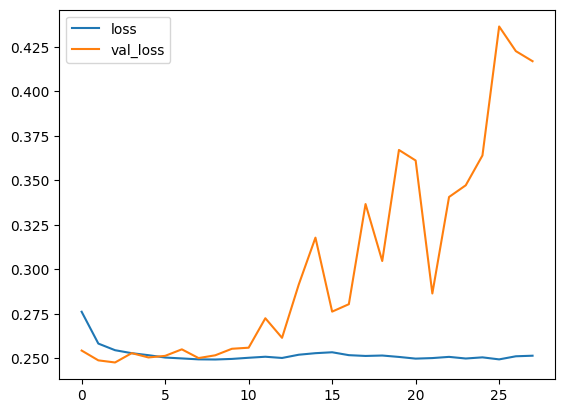

In [29]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
plt.show()

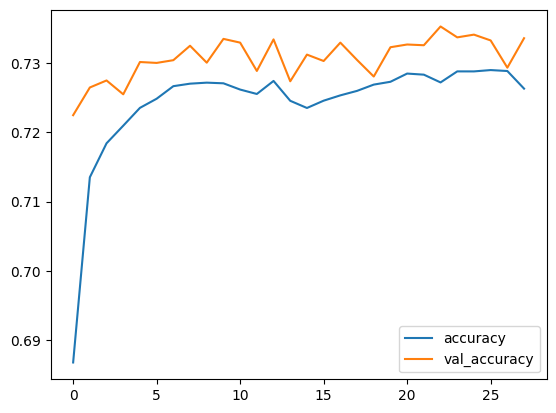

In [30]:
losses[['accuracy', 'val_accuracy']].plot()
plt.show()

In [31]:
preds = model.predict(X_train)

11339/11339 [==============================] - 10s 909us/step


In [32]:
print(preds[0])

[2.6193731e-03 7.0083552e-05 9.9629152e-01 4.1973224e-05 9.7706425e-04]


In [33]:
print(np.sum(preds[0]))

1.0


In [34]:
matrix = confusion_matrix(y_train.argmax(axis=1), preds.argmax(axis=1))

In [35]:
matrix

array([[42391,  9793,  4681,  3738, 11963],
       [ 1685, 69802,   301,    87,   691],
       [  817,   264, 69446,  1434,   605],
       [ 1492,  2955,   293, 58439,  9387],
       [15279, 10606,  2529, 15033, 29119]])

In [36]:
print(classification_report(y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63     72566
           1       0.75      0.96      0.84     72566
           2       0.90      0.96      0.93     72566
           3       0.74      0.81      0.77     72566
           4       0.56      0.40      0.47     72566

    accuracy                           0.74    362830
   macro avg       0.73      0.74      0.73    362830
weighted avg       0.73      0.74      0.73    362830



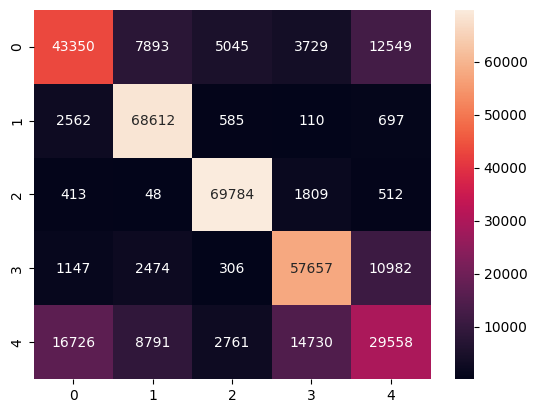

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

## For the testing dataset

In [24]:
preds = model.predict(X_test)

5561/5561 [==============================] - 5s 898us/step


In [25]:
print(preds[0])

[1.4701113e-02 9.5974613e-04 9.7751564e-01 1.0589865e-03 5.7644551e-03]


In [26]:
print(np.sum(preds[0]))

1.0


In [27]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [28]:
matrix

array([[20718,  4899,  2351,  1916,  5702],
       [ 1253, 33186,   365,   109,   673],
       [  483,   144, 34081,   513,   365],
       [  795,  1726,   162, 28474,  4429],
       [ 7583,  5372,  1321,  7250, 14060]])

In [29]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62     35586
           1       0.73      0.93      0.82     35586
           2       0.89      0.96      0.92     35586
           3       0.74      0.80      0.77     35586
           4       0.56      0.40      0.46     35586

    accuracy                           0.73    177930
   macro avg       0.72      0.73      0.72    177930
weighted avg       0.72      0.73      0.72    177930



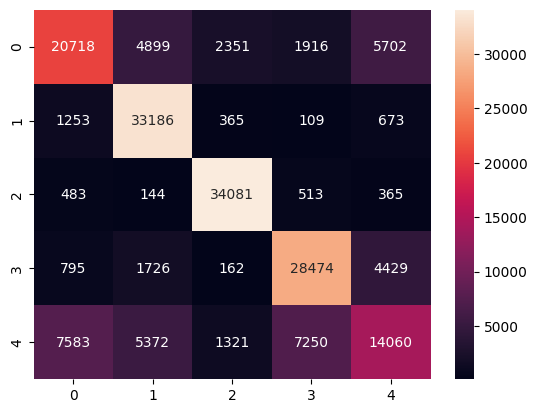

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

In [43]:
model.save('../saved_models/deep_learning_classifier.h5')

In [1]:
## load model
from tensorflow.keras.models import load_model
model = load_model('../saved_models/deep_learning_classifier.h5')

In [10]:
## calculate precision accuracy and recall.

def precision_accuracy_recall(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    precision = matrix[0][0] / (matrix[0][0] + matrix[1][0])
    accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
    recall = matrix[0][0] / (matrix[0][0] + matrix[0][1])
    return precision, accuracy, recall

## calculate precision accuracy and recall for the training data.

preds = model.predict(X_test)

preds = preds.argmax(axis = 1)

y_test = y_test.argmax(axis = 1)

precision, accuracy, recall = precision_accuracy_recall(y_test, preds)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('recall: ', recall)




1883/1883 [==============================] - 2s 899us/step
precision:  0.9957490808823529
accuracy:  0.81621103952638
recall:  0.8069081091146075


In [32]:

def f1_score(precision, recall):
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

f1 = f1_score(precision, recall)

print('f1 score: ', f1)

f1 score:  0.8914373875032142
